# Individual Assignment 5: Data Visualization

### Background Information


    In this assignment, we are analyzing sales data for an Australia-based company, WaterPro. Our main objective is to visualize:
    
    1. The correlation relationship between sales performance and temperature using both daily and monthly data.
    2. The average customer rating for each month.
    3. The distribution of customer reviews' sentiment polarity.
    4. A word cloud of customer reviews based on three categories: positive, neutral, and negative.
    
    The dataset consists of daily sales, temperature, and customer reviews.
    

### Task 1: Daily Sales vs Temperature Visualization

We start by loading and cleaning the dataset and then visualizing the correlation between sales performance and temperature using a scatter plot.

### Task 2: Monthly Average Sales and Temperature Visualization

Next, we group the data by month to calculate the average daily sales and temperature. The results are visualized using a line plot.

### Task 3: Sentiment Analysis of Customer Reviews


    We analyze the sentiment of customer reviews to classify them into Positive, Neutral, and Negative categories.
    A word cloud is generated for each category of reviews based on the polarity score.
    

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
from wordcloud import WordCloud

# Load the CSV file to inspect its contents
file_path = 'daily_sales (1).csv'
daily_sales_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
daily_sales_data.head()


,Description: this dataset shows number of WaterCure units sold per day and the corresponding daily temperature from January 2024 to August 2024,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,NaN,NaN,NaN
1,Date,Daily Units Sold,Daily Unit Price,Daily Temperature (C)
2,1/1/2024,91,24,25
3,1/2/2024,90,24,24
4,1/3/2024,70,24,19


In [ ]:
# Clean the dataset
cleaned_data = pd.read_csv(file_path, skiprows=2) # Skip the first two rows - likely has two header rows
cleaned_data.columns = ['Date', 'Daily Units Sold', 'Daily Unit Price', 'Daily Temperature (C)']

# Remove any rows with NaN values to ensure clean data
cleaned_data = cleaned_data.dropna()

# Conversion of 'Date' column to datetime format
cleaned_data['Date'] = pd.to_datetime(cleaned_data['Date'], format='%m/%d/%Y')

cleaned_data.head()

,Date,Daily Units Sold,Daily Unit Price,Daily Temperature (C)
0,2024-01-01,91,24.0,25
1,2024-01-02,90,24.0,24
2,2024-01-03,70,24.0,19
3,2024-01-04,89,24.0,23
4,2024-01-05,100,24.0,36


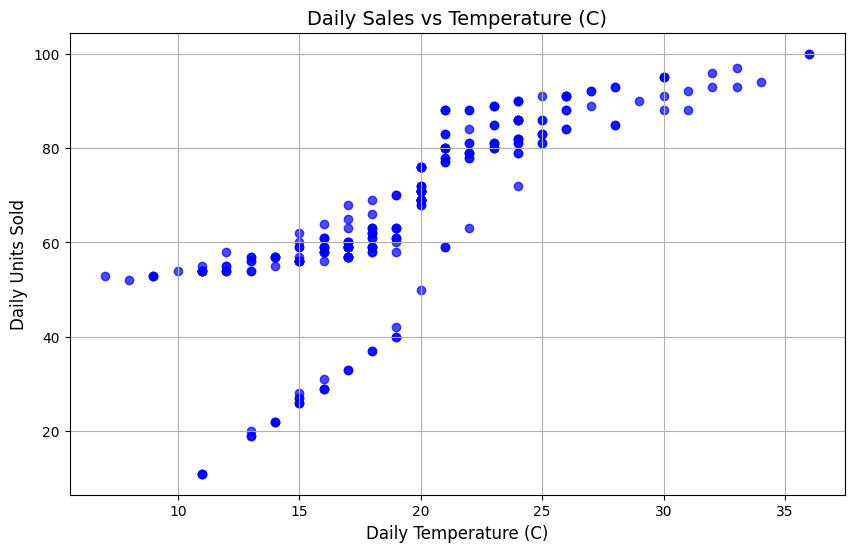

In [ ]:

# Scatter plot for daily sales vs. temperature
plt.figure(figsize=(10, 6))
plt.scatter(cleaned_data['Daily Temperature (C)'], cleaned_data['Daily Units Sold'], alpha=0.7, color='b')
plt.title('Daily Sales vs Temperature (C)', fontsize=14)
plt.xlabel('Daily Temperature (C)', fontsize=12)
plt.ylabel('Daily Units Sold', fontsize=12)
plt.grid(True)
plt.show()


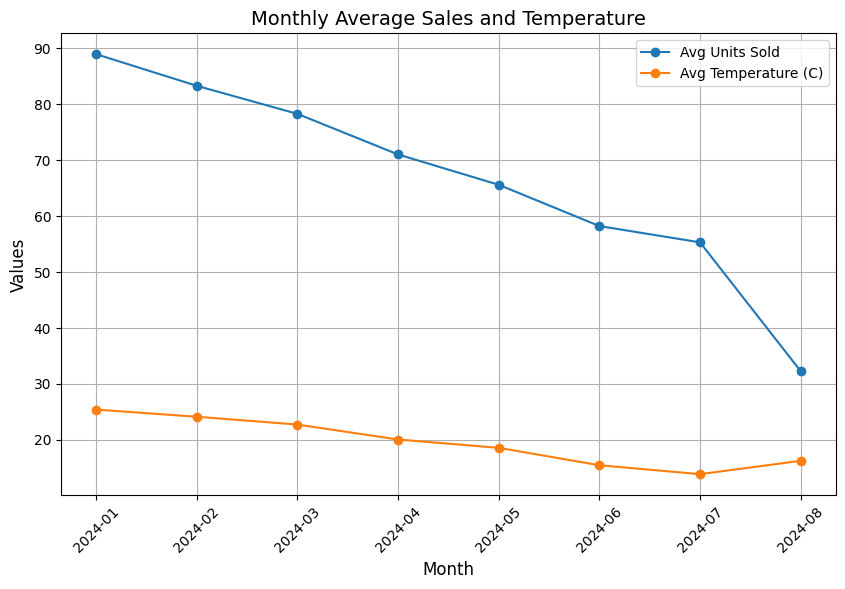

In [ ]:

# Adding a 'Month' column to the data
cleaned_data['Month'] = cleaned_data['Date'].dt.to_period('M')

# Grouping by 'Month' to get the average values for sales and temperature
monthly_data = cleaned_data.groupby('Month').agg({
    'Daily Units Sold': 'mean',
    'Daily Temperature (C)': 'mean'
}).reset_index()

# Line plot for monthly average sales vs temperature
plt.figure(figsize=(10, 6))
plt.plot(monthly_data['Month'].astype(str), monthly_data['Daily Units Sold'], label='Avg Units Sold', marker='o')
plt.plot(monthly_data['Month'].astype(str), monthly_data['Daily Temperature (C)'], label='Avg Temperature (C)', marker='o')
plt.title('Monthly Average Sales and Temperature', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()  # Add legend
plt.show()


In [ ]:

# Sample customer reviews
reviews_data = pd.DataFrame({
    'ReviewText': [
        "The product is great!",
        "Not satisfied with the purchase.",
        "It's okay, but could be better.",
        "Absolutely fantastic product!",
        "Could have been better, but not bad",
        "I hated it! Worst purchase."
    ]
})

# Analyze the sentiment of each review (positive, neutral, or negative)
reviews_data['Polarity'] = reviews_data['ReviewText'].apply(lambda text: TextBlob(text).sentiment.polarity)

# Categorize the reviews into Positive, Neutral, and Negative based on the polarity score
reviews_data['Sentiment'] = reviews_data['Polarity'].apply(
    lambda polarity: 'Positive' if polarity > 0 else ('Neutral' if polarity == 0 else 'Negative')
)

# Create a string of all reviews for each sentiment category
positive_reviews = ' '.join(reviews_data[reviews_data['Sentiment'] == 'Positive']['ReviewText'])
neutral_reviews = ' '.join(reviews_data[reviews_data['Sentiment'] == 'Neutral']['ReviewText'])
negative_reviews = ' '.join(reviews_data[reviews_data['Sentiment'] == 'Negative']['ReviewText'])


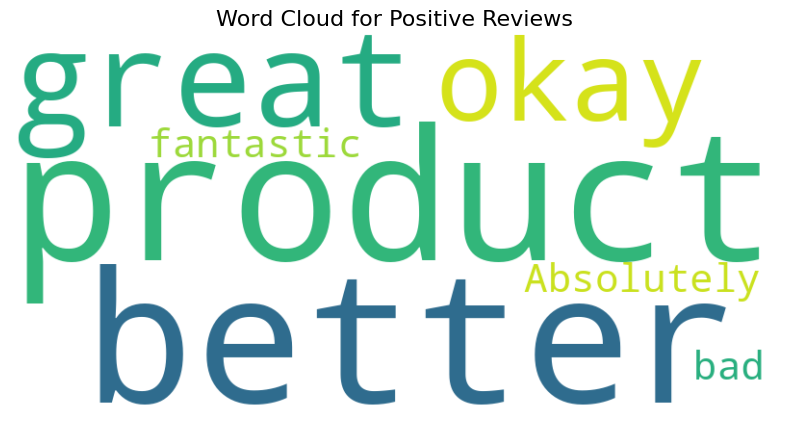

No Word Cloud for Neutral Reviews to display.


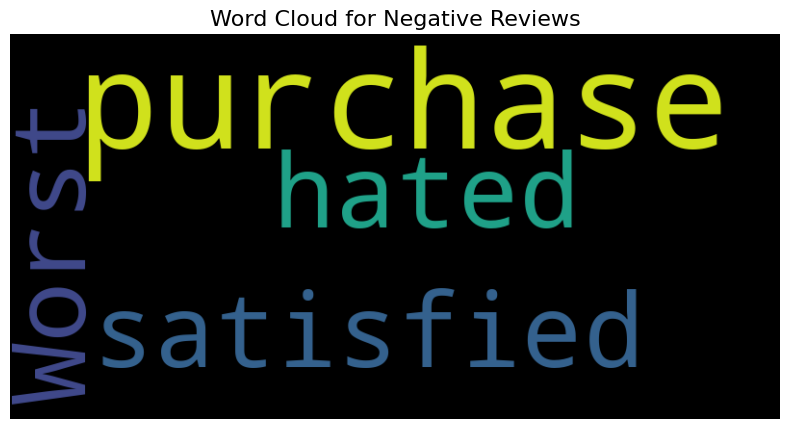

In [ ]:

# Function to generate and display word clouds
def generate_wordcloud(text, title, color='white'):
    if len(text) > 0:  # Check if text is not empty
        wordcloud = WordCloud(width=800, height=400, background_color=color, colormap='viridis').generate(text)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(title, fontsize=16)
        plt.show()
    else:
        print(f"No {title} to display.")  # Print a message if text is empty

# Generate word clouds for each type of review
generate_wordcloud(positive_reviews, "Word Cloud for Positive Reviews", color='white')
generate_wordcloud(neutral_reviews, "Word Cloud for Neutral Reviews", color='lightgray')
generate_wordcloud(negative_reviews, "Word Cloud for Negative Reviews", color='black')
